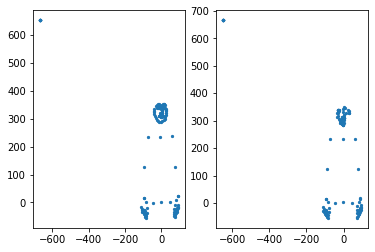

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def content_to_mat(content):
    mat = []
    for i in range(len(content)):
        if "Body" in content[i]:
            for j in range(25):
                record = content[i+1+j].lstrip().lstrip("[").rstrip("\n").rstrip("]")
                joint = [float(x) for x in record.split()]
                mat.append(joint)
        elif "Face" in content[i]:
            for j in range(70):
                record = content[i+1+j].lstrip().lstrip("[").rstrip("\n").rstrip("]")
                joint = [float(x) for x in record.split()]
                mat.append(joint)

        elif "Left" in content[i]:
            for j in range(21):
                record = content[i+1+j].lstrip().lstrip("[").rstrip("\n").rstrip("]")
                joint = [float(x) for x in record.split()]
                mat.append(joint)

        elif "Right" in content[i]:
            for j in range(21):
                record = content[i+1+j].lstrip().lstrip("[").rstrip("\n").rstrip("]")
                joint = [float(x) for x in record.split()]
                mat.append(joint)

    mat = np.array(mat)
    # 第三维是置信度，不需要
    mat = mat[:,0:2]
    return mat

def view_invariant_transform(mat):
    '''
      @params mat: T J D
    '''
#     index1 = 16
#     index2 = 12
    index1 = 9
    index2 = 12

    new_mat = np.zeros(mat.shape)
    for i in range(mat.shape[0]):
        delta_x,delta_y = mat[i,index2,:]-mat[i,index1,:]
        center_x,center_y = 0.5*(mat[i,index2,:]+mat[i,index1,:])
        length = (delta_x*delta_x+delta_y*delta_y)**0.5
        cos_theta = delta_x/length
        sin_theta = delta_y/length
        T = np.array([
            [cos_theta,-sin_theta],
            [-sin_theta,-cos_theta]
        ])
        t = np.array([center_x,center_y])
        # 对一帧中所有坐标进行具有视角不变性的变换
        # x'=Tx
        # origin_coord: J D
        origin_coord = mat[i,:,:]-t
        new_coord = np.matmul(T,origin_coord.transpose())
        new_coord = new_coord.transpose()
        new_mat[i,:,:] = new_coord
    return new_mat

filename = "000002.txt"
f = open(filename,"r")
content = f.readlines()
mat_1 = content_to_mat(content)
# plt.subplot(121)
# plt.scatter(mat_i[:,0],-mat_i[:,1],s=5)

filename = "000010.txt"
f = open(filename,"r")
content = f.readlines()
mat_2 = content_to_mat(content)
# plt.subplot(122)
# plt.scatter(mat_i[:,0],-mat_i[:,1],s=5)

mat = np.stack([mat_1,mat_2],0)
pMat = view_invariant_transform(mat)
for i,mat_i in enumerate(pMat):
    plt.subplot(1,2,i+1)
    plt.scatter(mat_i[:,0],mat_i[:,1],s=5)

plt.show()